# <font color = 'lightcoral'><b>Random Forest for Classifying Digits</b></font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits


In [2]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

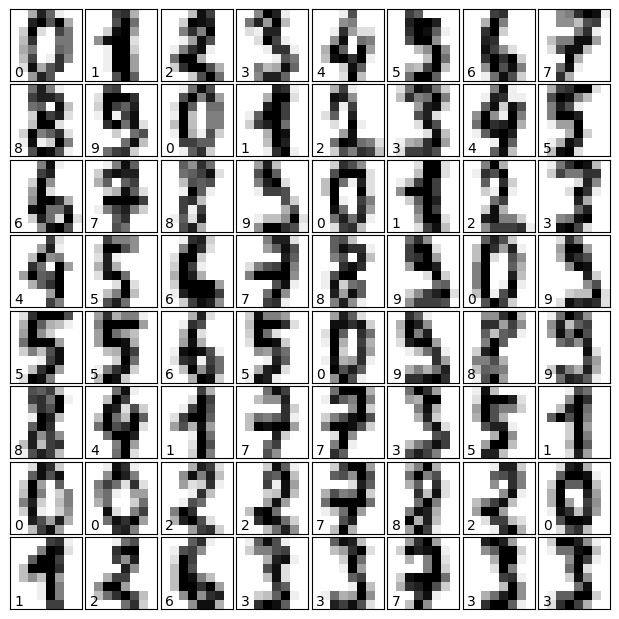

In [6]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [7]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=2)

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)

In [9]:
model.fit(Xtrain, ytrain)

RandomForestClassifier(n_estimators=1000)

In [10]:
ypred = model.predict(Xtest)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.9644444444444444

In [12]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.94      1.00      0.97        50
           2       1.00      1.00      1.00        47
           3       1.00      0.94      0.97        48
           4       0.95      0.90      0.92        40
           5       0.96      0.98      0.97        52
           6       1.00      0.98      0.99        43
           7       0.92      1.00      0.96        49
           8       0.93      0.93      0.93        40
           9       0.95      0.92      0.94        39

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.97      0.96      0.96       450



Text(77.92222222222227, 0.5, 'predicted label')

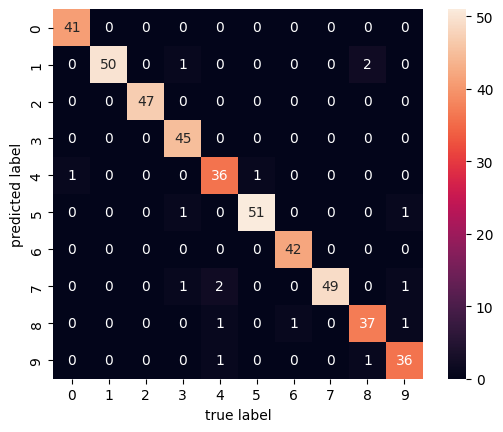

In [13]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot = True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
